 ###  Jetlee Joy, 19UBC130  ###

*Data visualization using Python*

# Heart Failure Prediction Analysis

input data : heart_failure_clinical_records.csv

source of input : David Chicco, Giuseppe Jurman

## preamble

Acquiring evidence for statement that we can predicit survival of patients with heart failure from serum creatinine and ejection fraction alone. 

##### *BMC Medical Informatics and Decision Making 20, 16 (2020).* ######



In [10]:
#importing libraries and input data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw = pd.read_csv('https://raw.githubusercontent.com/qu3st10nm2rk/datasets/master/heart_failure.csv')

In [12]:
#data preview
raw.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [14]:
raw.tail(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


### Data set feature description 

**Anaemia**

Anemia  is a decrease in the total amount of red blood cells (RBCs) or hemoglobin in the blood, or a lowered ability of the blood to carry oxygen.

anaemia: 0 if absent, 1 if present

**creatinine_phosphokinase**

The data describes the Level of the CPK enzyme in the blood (mcg/L)

**diabetes**

Diabetes mellitus (DM), commonly known as diabetes, is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time.

diabetes: 0 if absent, 1 if present

**ejection_fraction**

An ejection fraction (EF) is the volumetric fraction (or portion of the total) of fluid (usually blood) ejected from a chamber (usually the heart) with each heartbeat.

**high_blood_pressure**

Hypertension (HTN or HT), also known as high blood pressure (HBP), is a long-term medical condition in which the blood pressure in the arteries is persistently elevated

**platelets**

Platelets, also called thrombocytes are a component of blood whose function (along with the coagulation factors) is to react to bleeding from blood vessel injury by clumping, thereby initilizes blood clotting.

**serum_creatinine**

Creatinine is a breakdown product of creatine phosphate from muscle and protein metabolism. It is released at a constant rate by the body (depending on muscle mass).

**serum_sodium**

Sodium ions (Na+) are necessary in small amounts for some types of plants, but sodium as a nutrient is more generally needed in larger amounts by animals, due to their use of it for generation of nerve impulses and for maintenance of electrolyte balance and fluid balance. In animals, sodium ions are necessary for the aforementioned functions and for heart activity and certain metabolic functions.

**sex**

sex: 0 if female, 1 if male

**smoking**

smoking: 0 if absent, 1 if present

**time**

Follow-up period (in days).

**DEATH EVENT**

death_event: If the patient deceased during the follow-up period. 0 for no, 1 for yes.

In [16]:
#checking for any missing values
raw.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

*There exists no missing values*

In [18]:
#checking the type of features 
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


*All values are numeric and of type int and float*

______________________________________________________________________________________________________________________
## Feature Selection ##

Finding the best feature for prediction analysis


In [36]:
#grouping and splitting the dataset
independent = raw.drop("DEATH_EVENT", axis = 1)
dependent = raw["DEATH_EVENT"]

In [38]:
#importing the required library for data split
from sklearn.model_selection import train_test_split
#splitting the feature and target into train and test data , ratio : 70 : 20 , random state = 3
x_train, x_test, y_train, y_test = train_test_split(independent,dependent,test_size=0.2,random_state=2)

======================================================================================================================

## Approach 1 ##

### Selection approaches : 

 **1. Variance Threshold**

 **2. Pearson Correlation**
 

**Using Variance Threshold method to eliminate independent features having low variance**

In [24]:
#importing Threshold Variance
from sklearn.feature_selection import VarianceThreshold
# analyzing the train data:  threshold = 1
vt = VarianceThreshold(threshold = 1)
vt.fit(x_train)

VarianceThreshold(threshold=1)

In [40]:
#anlyzing the low variance features
vt.get_support()

array([ True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True])

In [56]:
#identifing the features having low variance
low_varience_column = [clm for clm in x_train.columns 
                        if clm not in x_train.columns[vt.get_support()]]
for feature in low_varience_column:
    print(feature)

anaemia
diabetes
high_blood_pressure
sex
smoking


Since low variance features are not suitable, removing the features from the corresponding feature train and test sample data

In [69]:
x_train2 = x_train.drop(low_varience_column,axis=1)
x_test2 = x_test.drop(low_varience_column,axis=1)

In [70]:
#new features set
x_train2.shape, x_test2.shape

((239, 7), (60, 7))

Using Pearson Modeling approach and eliminating features

*by Pearson approach*
- if 2 or more independent variables have high correlation, ideal apprach is to use any one of the features

- if a dependent and independent features have high correlation, sustain that independent feature

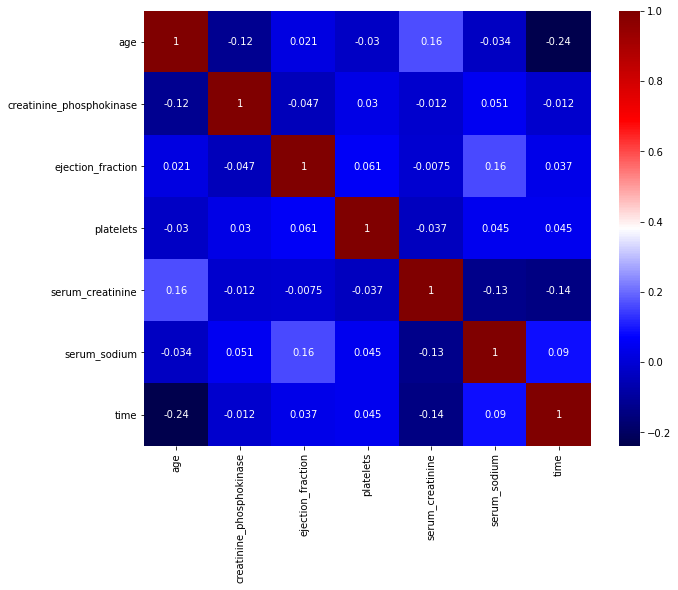

In [75]:
#importing necessary libaray
import seaborn as sns
#plotting the correlation in a heat map
plt.figure(figsize=(10,8))
correlation = x_train2.corr()
sns.heatmap(correlation, annot= True, cmap=plt.cm.seismic)
plt.show()

In [37]:
#identifing high correlated independent variable 
def highcorrelation(dataset, limit):
    high_corr = list()
    matrix = dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if (matrix.iloc[i,j]) >= limit:
                c_name = matrix.columns[i]
                if c_name in high_corr:
                    continue
                else:
                    high_corr.append(c_name)
    return high_corr 


In [41]:
#applied correlation threshold = 
high_corr = highcorrelation(x_train2, 0.05)
print(high_corr)


['platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [43]:
#new features set
x_train3 = x_train2.drop(high_corr, axis=1)
x_test3 = x_test2.drop(high_corr,axis=1)


## Approach 1 : Modeling for Proof ##

### Selection approaches : 

 **1. Decision Tree Classifier **

 **2. Random Forest Classifier **
 

In [45]:
#importing required libraries
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [47]:
# checking sample set sizes
x_train3.shape , y_train.shape, x_test3.shape, y_test.shape

((239, 3), (239,), (60, 3), (60,))

Implementing  Decision Tree Classifier

In [ ]:
model1 = tree.DecisionTreeClassifier(random_state = 2,criterion="entropy",max_leaf_nodes = 3)
model1.fit(x_train3,y_train)

In [33]:
prediction1 = model1.predict(x_test3)
score1 = accuracy_score(y_test, prediction1)
print("Accuracy in prediction ", score1*100,'%')

Accuracy in prediction  78.33333333333333 %


<Figure size 432x288 with 0 Axes>

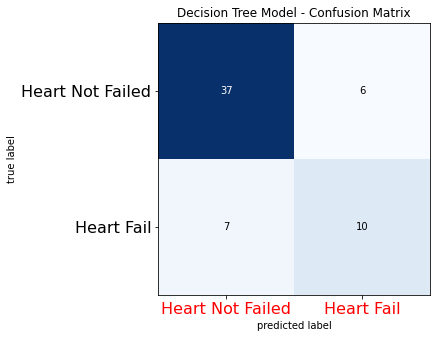

In [35]:
cm1 = confusion_matrix(y_test, prediction1)
plt.figure()
plot_confusion_matrix(cm1,figsize=(10,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16, color="red")
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [39]:
#adding the score to global list
prediction = list()
prediction.append(score1)

Implementing Random Forest Classifier

In [42]:
model2 = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=2)
model2.fit(x_train3, y_train)
prediction2 = model2.predict(x_test3)
score2 = accuracy_score(y_test, prediction2)
print("Accuracy in prediction ",score2 * 100 , "%")

Accuracy in prediction  76.66666666666667 %


<Figure size 432x288 with 0 Axes>

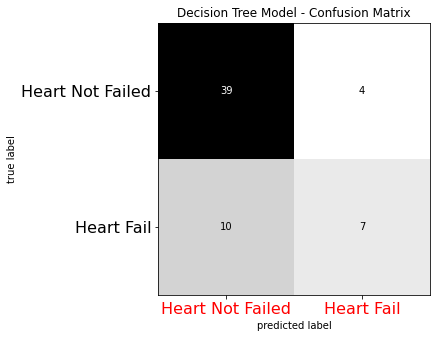

In [44]:
cm2 = confusion_matrix(y_test, prediction2)
plt.figure()
plot_confusion_matrix(cm2,figsize=(10,5), hide_ticks=True, cmap=plt.cm.binary)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16, color="red")
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [72]:
#adding the score to global list
prediction.append(score2)
#defining the two methods in the two approaches
models_names = ['Decision Tree','Random Forest']

### Final Prediction status from approach 1 ###

In [73]:
print(prediction)
print(models_names)

[0.7833333333333333, 0.7666666666666667, 0.9, 0.8666666666666667, 0.7666666666666667]
['Decision Tree', 'Random Forest']


=================================================================================================================================================

## Approach 2 ##

### Selection approaches : 

 **1. Variance Threshold**

 **2. Mutual information Classification**
 

Since variance threshold is already implemented and the resultant features set is available in x_train2 and x_test_2

In [51]:
#verifing values
x_train2.info(), x_test2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 53 to 168
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   creatinine_phosphokinase  239 non-null    int64  
 2   ejection_fraction         239 non-null    int64  
 3   platelets                 239 non-null    float64
 4   serum_creatinine          239 non-null    float64
 5   serum_sodium              239 non-null    int64  
 6   time                      239 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.9 KB


(None, (60, 7))

**Using Mutual information Classifier for finding the indenpendent features having higher dependence with target feature, here target feature is *DEATH_EVENT***

In [52]:
#importing requrired library
from sklearn.feature_selection import mutual_info_classif
#finding the dependancy
mi = mutual_info_classif(x_train2, y_train)

Text(0, 0.5, 'AFFINTY')

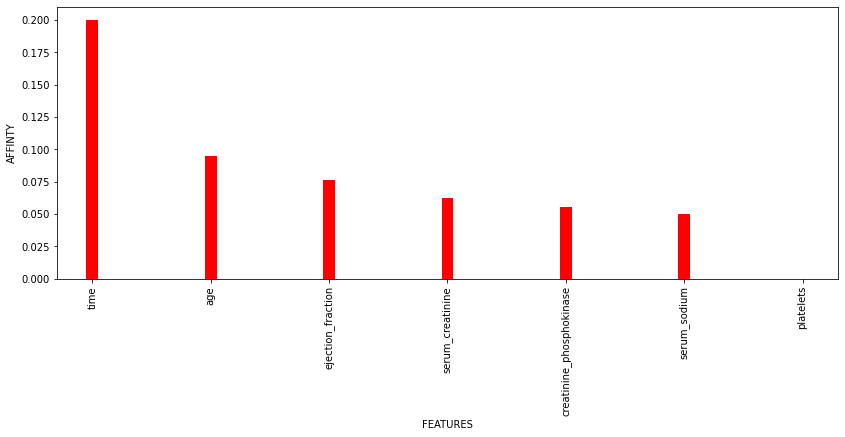

In [53]:
#plotting the dependence ration
mi = pd.Series(mi)
mi.index = x_train2.columns
fig = mi.sort_values(ascending=False).plot.bar(figsize = (14,5),color = 'red',width=0.1)
fig.set_xlabel('FEATURES')
fig.set_ylabel('AFFINTY')


In [54]:
#selecting the best feature with best affinity
#import the required library
from sklearn.feature_selection import SelectKBest

In [55]:
sc = SelectKBest(mutual_info_classif, k=3)
sc.fit(x_train, y_train)
x_train.columns[sc.get_support()]

Index(['ejection_fraction', 'serum_sodium', 'time'], dtype='object')

In [57]:
#new feature set
input_features = ['time','ejection_fraction','serum_creatinine']
model_input = raw[input_features]
model_target = raw['DEATH_EVENT']
# creating the split in the 80 : 20 ration
x_train4,x_test4,y_train,y_test = train_test_split(model_input,model_target,test_size=0.2,random_state=2)

In [58]:
#validating the shape 
x_train4.shape , x_test4.shape

((239, 3), (60, 3))

In [59]:
x_train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 53 to 168
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               239 non-null    int64  
 1   ejection_fraction  239 non-null    int64  
 2   serum_creatinine   239 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.5 KB


## Approach 2 : Modeling for Proof ##

### Selection approaches : 

 **1. Decision Tree Classifier **

 **2. Random Forest Classifier **

Implementing  Decision Tree Classifier

In [60]:
#validation of sample data
x_train4.shape, y_train, x_test4.shape, y_test.shape

((239, 3),
 53     1
 172    0
 23     0
 98     0
 244    0
       ..
 75     1
 22     1
 72     1
 15     1
 168    0
 Name: DEATH_EVENT, Length: 239, dtype: int64,
 (60, 3),
 (60,))

In [61]:
model3 = tree.DecisionTreeClassifier(random_state = 0,criterion="entropy",max_leaf_nodes = 3)
model3.fit(x_train4,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [62]:
prediction3 = model3.predict(x_test4)
score3 = accuracy_score(y_test, prediction3)
print("Accuracy in prediction ",score3 * 100 , "%")


Accuracy in prediction  90.0 %


<Figure size 432x288 with 0 Axes>

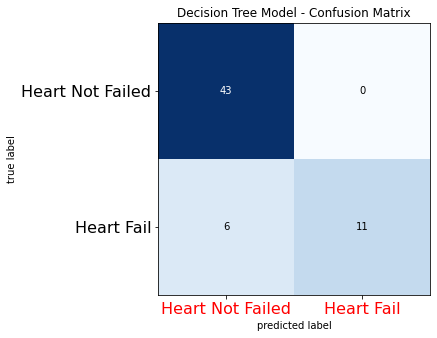

In [63]:
cm3 = confusion_matrix(y_test, prediction3)
plt.figure()
plot_confusion_matrix(cm3, figsize=(10,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16, color="red")
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [64]:
# including the accuracy in prediction list
prediction.append(score3)

Implementing Random Forest Classifier

In [65]:
model4 = RandomForestClassifier(max_features=0.3, max_depth=15, random_state=2)
model4.fit(x_train4, y_train)
prediction4 = model4.predict(x_test4)
score4 = accuracy_score(y_test, prediction4)
print("Accuracy in prediction ",score4 * 100 , "%")

Accuracy in prediction  86.66666666666667 %


<Figure size 432x288 with 0 Axes>

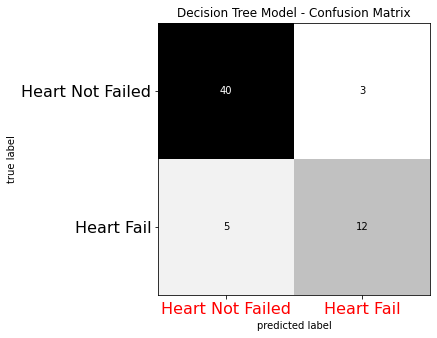

In [66]:
cm4 = confusion_matrix(y_test, prediction4)
plt.figure()
plot_confusion_matrix(cm4,figsize=(10,5), hide_ticks=True, cmap=plt.cm.binary)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16, color="red")
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [67]:
#adding the accuracy in prediction to global prediction list
prediction.append(score4)

### Final Prediction status from approach 2 ###

In [68]:
print(prediction[2::])
print(models_names)

[0.9, 0.8666666666666667]


NameError: name 'models_names' is not defined

=================================================================================================================================================

**Global Prediciton Accuracy Status**

In [209]:
print(prediction)

[0.7833333333333333, 0.7666666666666667, 0.9, 0.8666666666666667]


-------------------------------------------------------------------------------------------------------------------------------------------------

**approach 1 : features set :** 

In [210]:
print(x_train3)

      age  creatinine_phosphokinase  ejection_fraction
53   70.0                        69                 50
172  70.0                       171                 60
23   53.0                        63                 60
98   60.0                       156                 25
244  54.0                       582                 38
..    ...                       ...                ...
75   60.0                        47                 20
22   68.0                       220                 35
72   85.0                      5882                 35
15   82.0                       379                 50
168  65.0                       582                 40

[239 rows x 3 columns]


**approach 2 : features set :**

In [211]:
print(x_train4)

     time  ejection_fraction  serum_creatinine
53     44                 50               1.0
172   146                 60               1.1
23     22                 60               0.8
98     85                 25               1.2
244   213                 38               1.8
..    ...                ...               ...
75     73                 20               0.7
22     20                 35               0.9
72     72                 35               1.0
15     13                 50               1.3
168   140                 40               1.0

[239 rows x 3 columns]


**Prediction analysis graph**

In [226]:
#splitting accuracy
set1 = prediction[0:2]
set2 = prediction[2::]
models_names = list(models_names)

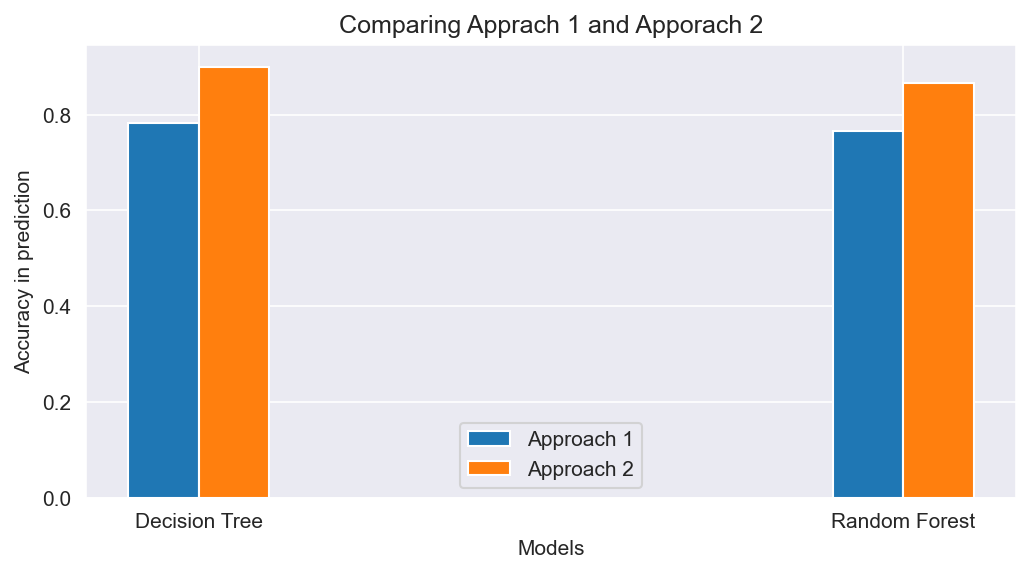

In [251]:
plt.figure(figsize=(8,4),dpi = 150)
w = 0.1
bar1 = np.arange(len(models_names))
bar2 = [i+w for i in bar1]
plt.bar(bar1,set1,w,label="Approach 1")
plt.bar(bar2,set2,w,label="Approach 2")
plt.xlabel("Models")
plt.ylabel("Accuracy in prediction")
plt.title("Comparing Apprach 1 and Apporach 2")
plt.xticks(bar1+w/2,models_names)
plt.legend()
plt.show()

Inference derived from bar garph is * Approach 2 yields more prediction accuracy than Approach 1* , Hence the feature set of approach 2 is more appropriate for the prediction of survival of Heart patients .

Features are : 

In [250]:
x_train4.head(2)

,time,ejection_fraction,serum_creatinine
53,44,50,1.0
172,146,60,1.1


**Hence I can conclude that features like ejection_fraction , serum_creatinine and time can be effeciently used for the prediction of survival of heart patients.**